In [2]:
import tensorflow as tf
from keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [3]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS= 3

In [4]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r"F:\Next24Tech\plant leaf desease detection\train",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
    
)

Found 13032 files belonging to 7 classes.


In [5]:
class_names = train_dataset.class_names
class_names

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [6]:
len(train_dataset)

408

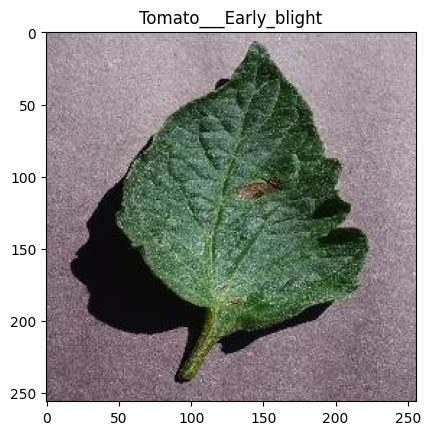

In [7]:
for image_batch, label_batch in train_dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])

In [8]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r"F:\Next24Tech\plant leaf desease detection",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE   
)

valid_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r"F:\Next24Tech\plant leaf desease detection\valid",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE  
)

Found 16305 files belonging to 3 classes.
Found 3257 files belonging to 7 classes.


In [9]:
train_dataset= train_dataset.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_dataset= test_dataset.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
valid_dataset= valid_dataset.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [10]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [11]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [16]:
input_shape = (BATCH_SIZE, IMAGE_SIZE,IMAGE_SIZE, CHANNELS)
n_classes = 7
EPOCHS=10

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes,activation='softmax')
])
model.build(input_shape=input_shape)

In [17]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (32, 516128)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (32, 64)               │    33,032,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (32, 7)                │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,033,607 (126.01 MB)

 Trainable params: 33,033,607 (126.01 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics= ['accuracy']
)

In [21]:
model.fit(
    train_dataset,
    epochs=EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data=valid_dataset
)

Epoch 1/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 423s 1s/step - accuracy: 0.7996 - loss: 0.5933 - val_accuracy: 0.7992 - val_loss: 0.6344
Epoch 2/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 382s 937ms/step - accuracy: 0.8330 - loss: 0.4698 - val_accuracy: 0.8364 - val_loss: 0.4598
Epoch 3/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 398s 975ms/step - accuracy: 0.8552 - loss: 0.4108 - val_accuracy: 0.8351 - val_loss: 0.5097
Epoch 4/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 2256s 6s/step - accuracy: 0.8702 - loss: 0.3878 - val_accuracy: 0.8127 - val_loss: 0.5765
Epoch 5/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 394s 958ms/step - accuracy: 0.8716 - loss: 0.3657 - val_accuracy: 0.8582 - val_loss: 0.4586
Epoch 6/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 2137s 5s/step - accuracy: 0.8690 - loss: 0.3598 - val_accuracy: 0.8557 - val_loss: 0.4036
Epoch 7/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 529s 1s/step - accuracy: 0.8793 - loss: 0.3424 - val_accuracy: 0.8830 - val_loss: 0.3531
Epoch 8/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 560s 1s/step - accuracy: 0.8914 - loss: 0.3251

In [ ]:
scores = model.evaluate(test_dataset)

: 

In [ ]:
acc = history.history['accuracy']
